In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import tensorflow as tf
import scipy.stats as sps
import scipy.spatial as spt
from sklearn.cross_validation import train_test_split

import edward as ed
from edward.models import Normal, Dirichlet, Multinomial, Gamma, Empirical
from tensorflow.contrib.linalg import LinearOperatorTriL
import itertools
import sys
sys.path.insert(0, tf.__path__[0] + '/contrib/distributions/python/ops')
import bijectors as bijector

/home/folzd/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
M = 100
K = 3
D = 2

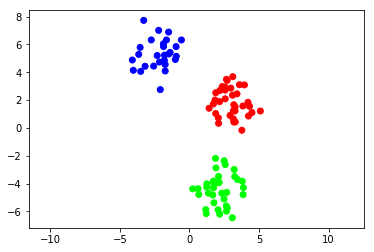

In [16]:
sess = tf.Session()
with sess.as_default():
    means = ed.models.MultivariateNormalDiag(tf.zeros([K,D]),tf.ones([K,D])*10)
    assignments = Multinomial(total_count=1.,probs=tf.reshape(tf.tile(np.ones(K,dtype=np.float32),[M]),[M,K]))
    obs = ed.models.MultivariateNormalDiag(tf.matmul(assignments,means),tf.ones([M,D]))
    init = tf.global_variables_initializer()
    init.run()
    #z_sample = assignments.sample().eval()
    z_sample = ed.copy(assignments).sample().eval()
    
    #z_test = np.zeros((M,K))
    #z_test[:30,0] = 1
    #z_test[30:60,1] = 1
    #z_test[60:,2] = 1
    plt.scatter(*ed.copy(obs,{assignments:z_sample}).eval().T,c=z_sample)
    #plt.scatter(*ed.copy(obs,{assignments:z_test}).eval().T,c=z_sample)
    plt.axis('equal')